<a href="https://colab.research.google.com/github/riponalmamun/Brainwave_Matrix_Intern_Task2/blob/main/Credit_card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
!gdown --id 1wG6m7aq6VabZIDBXhBPnIVXn6_Brm8Od


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1wG6m7aq6VabZIDBXhBPnIVXn6_Brm8Od
From (redirected): https://drive.google.com/uc?id=1wG6m7aq6VabZIDBXhBPnIVXn6_Brm8Od&confirm=t&uuid=91a02877-cc0a-4492-b348-6ef45b21cc7a
To: /content/creditcard.csv
100% 150M/150M [00:01<00:00, 118MB/s]


# Import Liabraries

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from sklearn.ensemble import IsolationForest

# Data Preprocessing and EDA

In [137]:
# Load the dataset
data = pd.read_csv('/content/creditcard.csv')

In [138]:
# first 5 rows of the dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [139]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [140]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  int64  
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [141]:
# checking the number of missing values in each column
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [142]:
# Check the distribution of the target variable
print(data['Class'].value_counts())


Class
0    284315
1       492
Name: count, dtype: int64


# This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [143]:
# separating the data for analysis
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [144]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [145]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [146]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [147]:
# compare the values for both transactions
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [148]:
legit_sample = legit.sample(n=492)

# Concatenating two DataFrames

In [149]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [150]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
241952,151263,0.034174,0.701817,-1.208902,-1.066605,3.517150,3.382380,0.768808,0.335060,-0.167691,...,0.217347,0.970402,-0.337629,0.650551,-0.270160,-0.052596,-0.232254,-0.240530,4.48,0
134831,80985,-0.714497,0.733615,1.329710,-1.173355,0.337386,-0.851217,1.357847,-0.403582,-0.215295,...,-0.124474,-0.367905,-0.408355,-0.094537,0.416905,0.920603,-0.368451,-0.211193,49.55,0
265884,162090,-1.049551,1.100331,0.747867,0.401153,1.220210,-0.904543,1.666139,-0.584342,0.035979,...,-0.529856,-0.916277,-0.161592,-0.191128,0.920582,-0.795576,-0.133220,-0.290257,40.03,0
174866,122106,1.991774,0.287427,-1.357578,0.756348,-0.221544,-2.043039,0.330150,-0.478979,0.460497,...,0.254227,0.925151,0.082064,0.870337,0.148417,-0.160309,0.002661,-0.018667,4.59,0
96658,65870,-1.092659,1.173957,-0.593967,-0.801023,2.119828,3.492562,-0.670270,0.532486,-0.609402,...,0.570622,-1.031399,0.089096,0.986803,-0.403282,0.134997,0.175506,0.097604,0.89,0


In [151]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [152]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [153]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94285.936992,0.067253,0.030244,0.071526,0.023910,-0.023646,-0.060186,-0.102812,-0.003404,0.082088,...,0.013836,0.068638,-0.051616,-0.018746,0.087844,0.025732,-0.013078,0.005702,0.008538,83.478028
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Splitting the data into Features & Targets

In [154]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [155]:
print(X)

          Time        V1        V2        V3        V4        V5        V6  \
241952  151263  0.034174  0.701817 -1.208902 -1.066605  3.517150  3.382380   
134831   80985 -0.714497  0.733615  1.329710 -1.173355  0.337386 -0.851217   
265884  162090 -1.049551  1.100331  0.747867  0.401153  1.220210 -0.904543   
174866  122106  1.991774  0.287427 -1.357578  0.756348 -0.221544 -2.043039   
96658    65870 -1.092659  1.173957 -0.593967 -0.801023  2.119828  3.492562   
...        ...       ...       ...       ...       ...       ...       ...   
279863  169142 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  ...       V20       V21  

In [156]:
print(Y)

241952    0
134831    0
265884    0
174866    0
96658     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


# Split the data into Training data & Testing Data

In [157]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [158]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


# Accuracy Score

In [159]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [160]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8716645489199492


In [161]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [162]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.8730964467005076


In [163]:
# Split the data into features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

In [164]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [165]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [166]:
# Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Model Training and Evaluation
Logistic Regression

In [167]:
model = LogisticRegression()

In [168]:
# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [169]:
# Make predictions
y_pred = model.predict(X_test)

In [170]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.78      0.83       148

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



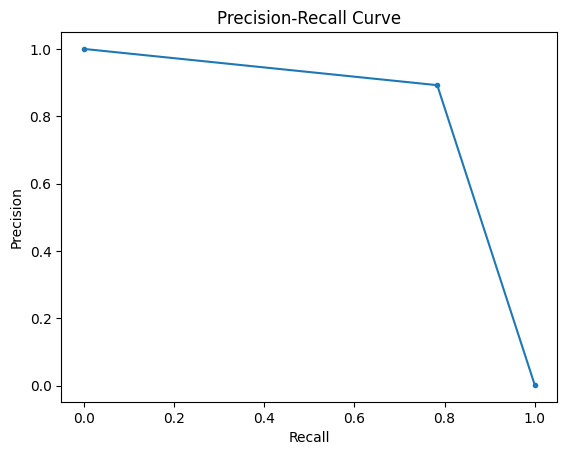

In [171]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [172]:
# Calculate AUPRC
auprc = auc(recall, precision)
print(f'Area Under the Precision-Recall Curve (AUPRC): {auprc}')

Area Under the Precision-Recall Curve (AUPRC): 0.8382329973882237


# Anomaly Detection Example

In [173]:
# Train an Isolation Forest model
anomaly_model = IsolationForest(contamination=0.001, random_state=42)
anomaly_model.fit(X_train)

IsolationForest(contamination=0.001, random_state=42)

In [174]:
# Predict anomalies
y_anomaly_pred = anomaly_model.predict(X_test)

In [175]:
# Convert anomaly scores to binary labels (1 for normal, -1 for anomaly)
y_anomaly_pred = np.where(y_anomaly_pred == 1, 0, 1)

In [176]:
# Evaluate the model
print(classification_report(y_test, y_anomaly_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.36      0.20      0.26       148

    accuracy                           1.00     85443
   macro avg       0.68      0.60      0.63     85443
weighted avg       1.00      1.00      1.00     85443



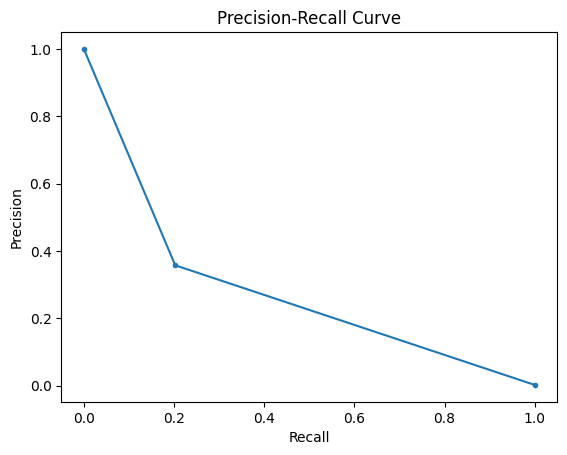

In [177]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_anomaly_pred)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [178]:
# Calculate AUPRC
auprc = auc(recall, precision)
print(f'Area Under the Precision-Recall Curve (AUPRC): {auprc}')

Area Under the Precision-Recall Curve (AUPRC): 0.28061329874819574
